In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
warnings.filterwarnings("ignore")

In [63]:
data = pd.read_csv("Language Detection.csv", error_bad_lines=False)

In [66]:
print("I dieci primi elementi:\n",data.head(8))


I dieci primi elementi:
                                                 Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
5  [2] In ancient philosophy, natura is mostly us...  English
6  [3][4] \nThe concept of nature as a whole, the...  English
7  During the advent of modern scientific method ...  English


In [67]:
righe, colonne = data.shape
print("Il data set ha {} colonne et {} righe.".format(colonne, righe))

Il data set ha 2 colonne et 10271 righe.


In [68]:
print("informazione :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271 entries, 0 to 10270
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10271 non-null  object
 1   Language  10271 non-null  object
dtypes: object(2)
memory usage: 160.6+ KB
informazione : None


In [69]:
print(data.isnull().sum())

Text        0
Language    0
dtype: int64


In [70]:
print("dati duplicati : ", len(data[data.duplicated()]))

dati duplicati :  0


In [71]:
print("togliamo i duplicati e vedremo quanti dati rimangano !")
data.drop_duplicates(inplace=True)
print("data shape: ",data.shape)

togliamo i duplicati e vedremo quanti dati rimangano !
data shape:  (10271, 2)


In [72]:
print("Linguaggi trovati : ", data["Language"].nunique())

Linguaggi trovati :  17


In [73]:
print("quante volte ogni linguaggio usato :\n", data["Language"].value_counts())

quante volte ogni linguaggio usato :
 English       1382
French        1007
Spanish        816
Portuguese     736
Italian        694
Russian        688
Swedish        673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64


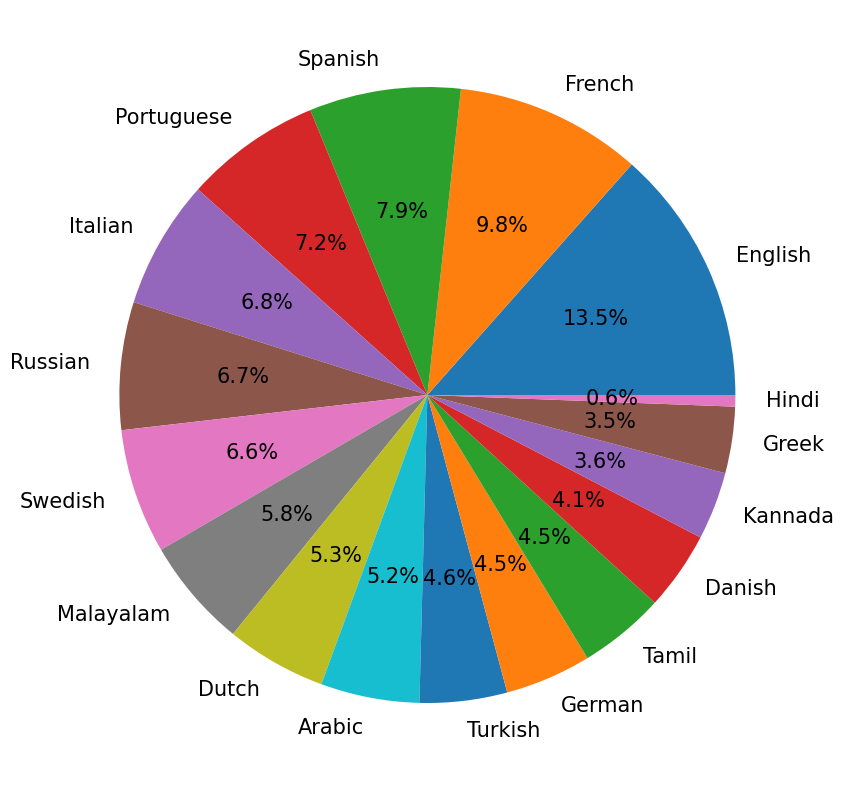

In [74]:
language = data["Language"].value_counts().reset_index()
plt.figure(figsize=(10,10))
labels= language['index']
plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

In [28]:
data1 = data.copy()
data1["cleaned_Text"] = ""
print(data1)

                                                    Text Language cleaned_Text
0       Nature, in the broadest sense, is the natural...  English             
1      "Nature" can refer to the phenomena of the phy...  English             
2      The study of nature is a large, if not the onl...  English             
3      Although humans are part of nature, human acti...  English             
4      [1] The word nature is borrowed from the Old F...  English             
...                                                  ...      ...          ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada             
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada             
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada             
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada             
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada             

[10271 rows x 3 columns]


In [29]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags
  return Text

In [30]:
data1["cleaned_Text"] = data1["Text"].apply(lambda x:clean_func(x))
print(data1)

                                                    Text Language  \
0       Nature, in the broadest sense, is the natural...  English   
1      "Nature" can refer to the phenomena of the phy...  English   
2      The study of nature is a large, if not the onl...  English   
3      Although humans are part of nature, human acti...  English   
4      [1] The word nature is borrowed from the Old F...  English   
...                                                  ...      ...   
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada   
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada   
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada   
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada   
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada   

                                            cleaned_Text  
0       nature  in the broadest sense  is the natural...  
1       nature  can refer to the phenomena of the phy

In [31]:
X = data1["cleaned_Text"]
y = data1["Language"]

In [32]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [33]:
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()


In [34]:
print(X.shape)


(10271, 39404)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
models = {"M_Naive_Bayes" : MultinomialNB(), "Random_Forest" : RandomForestClassifier()}

for name, model in models.items():
  print( f'{name} training started...')
  model.fit(X_train, y_train)
  print(f'{name} trained.')


M_Naive_Bayes training started...
M_Naive_Bayes trained.
Random_Forest training started...
Random_Forest trained.


In [37]:
for name in models:
  acc_score = accuracy_score(y_test, models.get(name).predict(X_test))
  print(f'{name} accuracy score :  {acc_score}')


M_Naive_Bayes accuracy score :  0.9805295950155763
Random_Forest accuracy score :  0.92601246105919


In [38]:
def prediction(text):
  x = CV.transform([text]).toarray()  # converting text to bag of words model (Vector)
  for name in models:
    lang = models.get(name).predict(x)
    lang = encoder.inverse_transform(lang) # finding the language corresponding to the predicted value
    print("{} has predicted the language of {} is : {}. " .format(name, text, lang[0]))


In [39]:
prediction( "أنا أحب زكا وفريقها الرائع")


M_Naive_Bayes has predicted the language of أنا أحب زكا وفريقها الرائع is : Arabic. 
Random_Forest has predicted the language of أنا أحب زكا وفريقها الرائع is : Arabic. 


In [40]:
prediction("je suis khalil")

M_Naive_Bayes has predicted the language of je suis khalil is : French. 
Random_Forest has predicted the language of je suis khalil is : French. 


In [41]:
prediction("How are you !")

M_Naive_Bayes has predicted the language of How are you ! is : English. 
Random_Forest has predicted the language of How are you ! is : English. 


In [42]:
prediction("Ich liebe Zaka und ihre nettes Team")

M_Naive_Bayes has predicted the language of Ich liebe Zaka und ihre nettes Team is : German. 
Random_Forest has predicted the language of Ich liebe Zaka und ihre nettes Team is : German. 


In [43]:
prediction("una prova per l'italiano")

M_Naive_Bayes has predicted the language of una prova per l'italiano is : Italian. 
Random_Forest has predicted the language of una prova per l'italiano is : Italian. 
